In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()


In [16]:
ds = pd.read_csv("adult.csv")
ds.replace('?', np.nan, inplace=True)
ds.dropna(inplace=True)

In [17]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_train[:, 1:]=imputer.fit_transform(x_train[:,1:]) 

In [20]:
from sklearn.preprocessing import LabelEncoder

ordinal_categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]

label_encoders = []
for col_index in ordinal_categorical_columns:
    le = LabelEncoder()
    x_train[:, col_index] = le.fit_transform(x_train[:, col_index])
    x_test[:, col_index] = le.transform(x_test[:, col_index])
    label_encoders.append(le)

In [21]:
from sklearn.preprocessing import LabelEncoder
lb_obj= LabelEncoder() 
y_train=lb_obj.fit_transform(y_train)
y_test=lb_obj.transform(y_test)

In [22]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()  
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model=Sequential()

In [27]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_normalized.shape[1],1)))
model.add(Dropout(0.2))

In [28]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [29]:
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

In [30]:
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [31]:
model.add(Dense(units=1))

In [39]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [40]:
model.fit(x_train_normalized, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
814/814 [==============================] - 16s 15ms/step - loss: 0.1774 - accuracy: 0.7576
Epoch 2/100
814/814 [==============================] - 13s 17ms/step - loss: 0.1657 - accuracy: 0.7584
Epoch 3/100
814/814 [==============================] - 15s 18ms/step - loss: 0.1517 - accuracy: 0.7758
Epoch 4/100
814/814 [==============================] - 15s 18ms/step - loss: 0.1447 - accuracy: 0.7876
Epoch 5/100
814/814 [==============================] - 16s 20ms/step - loss: 0.1403 - accuracy: 0.7948
Epoch 6/100
814/814 [==============================] - 16s 20ms/step - loss: 0.1371 - accuracy: 0.8009
Epoch 7/100
814/814 [==============================] - 16s 20ms/step - loss: 0.1314 - accuracy: 0.8123
Epoch 8/100
814/814 [==============================] - 17s 21ms/step - loss: 0.1270 - accuracy: 0.8187
Epoch 9/100
814/814 [==============================] - 18s 22ms/step - loss: 0.1242 - accuracy: 0.8184
Epoch 10/100
814/814 [==============================] - 17s 21ms/step - l

In [43]:
predicted_stock_price = model.predict(x_test_normalized)
predicted_stock_price = np.tile(predicted_stock_price, 14)
predicted_stock_price = predicted_stock_price.reshape(-1, 14)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)


204/204 [==============================] - 2s 9ms/step


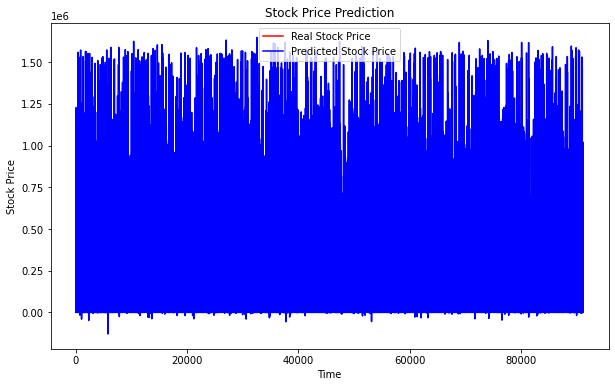

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price.flatten(), color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
